
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


    
Thank you for your diligence on such a hard project!  You can find my new comments with digit 3. 
    
    
    
I would like to say that you demonstrated strong data science skills by successfully performing data preprocessing, handling missing values, and conducting detailed exploratory data analysis. You trained and compared machine learning models, and estimated their sMAPE scores. You did a great job, and I hope you enjoyed it.
    
    
    
    
I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2 </b>
    
Thank you very much for taking the time to update the project! There're just a couple of issues this time. Would you take a look at my new comments with digit 2?
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Chris, I am a reviewer on this project. Congratulations on submitting the second integrated project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully added an introduction that reflects the main goal of the project, well done!  
    
    
- Read the data;

    
- Validated the data we have using the recovery calculation formula; 


- Correctly handled missing values;    
        
    
- Displayed concentration histograms for three metals and analyzed them;    
    
    
- Displayed total concentration histograms for three metals and analyzed them;  


- Added titles and both axes labels to the charts;
    
    
- You have successfully compared the distributions in the test and training sets;

    
- Correctly defined the smape functions; 
    
    
- Trained several models; 


- Tuned hyperparameters. We tune them to identify the best model that will yield the desired metric value;


- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;


    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance: 
    

    
- Please pay attention to the columns not available in the test set. Why is that so? What do they indicate? Do we need to use them during the training process? 
    
    
- We need to drop missing values from the target columns before we fill in the gaps.

    
- Please fix the issue I described in the concentration analysis section. 
    

    
There may be some other issues, I explained everything in my comments.    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much! The updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 

    
<hr>
    
✍️ Here's a nice article: [Developing Multi-Target Regression Models with Python](https://medium.com/@tubelwj/developing-multi-class-regression-models-with-python-c8beca5dd482) that you may find interesting.    
<hr>
    
📌 Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 
</div>


# Sprint 10 Integrated Project 2
# Introduction

___
In this project we'll be analyzing data from mined ores through its extraction process as shown below. The figures includes the features and target data:

<img src="https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_ore_1591699963.jpg" height=900px, width=1200px>

We are tasked to simulate the recovery of gold from gold ore using the calculations below to ensure the calculated values on the datasets are accurate: 

<img src="https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_Recovery_1576238822_1589899219.jpg" height=250px width=1200px>

We will also build a model that predicts the two following targets;<ul>
    `rougher.output.recovery`<br>
    `final.output.recovery`</ul>

The datasets can be found within the following links for reproducibility:<br>
- <a href="https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv">gold_recovery_full.csv</a><br>
- <a href="https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv">gold_recovery_train.csv</a><br>
- <a href="https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv">gold_recovery_test.csv</a>

Several different models will be trained and tested using cross validation. The best performing model will be chosen for final test.

Stages:<ol>
    1. Data Overview <br>
    2. Data Preprocessing <br>
    3. Data Analysis <br>
    4. Feature Preprocessing <br>
    5. Model Creation/Testing <br>
    6. Final Model Selection/Testing <br>
    7. Conclusion </ol>

## Data Overview
---

In [1]:
# Importing libraries
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
# Loading datasets
source_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv')
training_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')
test_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')
datasets = [source_df,training_df,test_df] # Assigning datasets into list variable for future iterability

In [3]:
# Printing dataset info
for dataset in datasets:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


dypes look good except for the `date` dtype. Will be converted to datatime. We will address missing values later.

In [4]:
# Changing ``date` dtype
training_df['date'] = pd.to_datetime(training_df['date'],format='%Y-%m-%d %H:%M:%S')

In [5]:
# Checking for suplicates
training_df.duplicated().sum()

0

In [6]:
# Chekcking dimensions
for dataset in datasets:
    print(dataset.shape)

(22716, 87)
(16860, 87)
(5856, 53)


There is a discrepancy in the number of features of training and test sets. Let's look into which ones they both have and which are missing.

In [7]:
# Isolating training and test set shared columns
train_test_cols = list(set(training_df.columns).intersection(set(test_df.columns)))
train_test_cols.sort()
print('Shared Features:')
train_test_cols

Shared Features:


['date',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

In [8]:
# Isolating test set missing columns
miss_test_cols = list(set(training_df.columns)-set(test_df.columns))
miss_test_cols

['rougher.calculation.au_pb_ratio',
 'final.output.concentrate_pb',
 'final.output.tail_au',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.recovery',
 'final.output.tail_pb',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_pb',
 'final.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_sol',
 'final.output.tail_ag',
 'rougher.output.concentrate_au',
 'final.output.concentrate_sol',
 'final.output.recover

Test set is missing mainly output dtype float values. We'll take the missing `test_df` target columns from `source_df` and join them on the `date` column to complete the test set for future testing.

## Data Preprocessing
---

In [9]:
# Sorting datasets by 'date'
for data in datasets:
    data = data.sort_values(by='date')

In [10]:
source_df.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [11]:
# Adding missing target columns to test_df from source_df
test_df = test_df.merge(source_df[['date','rougher.output.recovery','final.output.recovery']],on='date',how='left')

In [12]:
test_df[test_df['date'] == '2017-12-31 21:59:59'][['date','rougher.output.recovery','final.output.recovery']] # Confirming changes are accurate

,date,rougher.output.recovery,final.output.recovery
5853,2017-12-31 21:59:59,93.018138,67.092759


In [13]:
source_df[source_df['date'] == '2017-12-31 21:59:59'][['date','rougher.output.recovery','final.output.recovery']] # Checking if merge was successfully executed

,date,rougher.output.recovery,final.output.recovery
17206,2017-12-31 21:59:59,93.018138,67.092759


Now that we've addressed the dtype error and feature discrepancy, we'll now create a recovery functioin that simulates the recovery of gold from gold ore.

In [14]:
# Dropping `date` columns in order to run our datasets through the function
training_df = training_df.drop('date',axis=1)
test_df = test_df.drop('date',axis=1)

In [15]:
# Creating recovery function
def rough_recovery(df):
    c = df['rougher.output.concentrate_au']
    f = df['rougher.input.feed_au']      
    t = df['rougher.output.tail_au'] 
    result = ((c * (f - t)) / (f * (c - t))) * 100
    return result

In [16]:
# Calculating recovery score
recovery = rough_recovery(training_df)

# Printing recovery scores
print('Calculated recovery scores:\n\n',recovery)
print()
print('Dataset recovery scores:\n\n',training_df['rougher.output.recovery'])

Calculated recovery scores:

 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

Dataset recovery scores:

 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64


In [17]:
# Calculting mean absolute error from our calculations and the training set's rougher recovery
mae = np.abs(recovery-training_df['rougher.output.recovery'])
print('Rougher Recovery Calculations:')
print('Mean Absolute Error: ',mae.mean())
print('Average Recovery Value: ', training_df['rougher.output.recovery'].mean())

Rougher Recovery Calculations:
Mean Absolute Error:  9.303415616264301e-15
Average Recovery Value:  82.39420120842001


We notice the calculations are spot when comparing the printed results of the calculations and the recovery values already on the dataset. The mean absolute error is likely due to missing values within the dataset.

We know the missing values are similar to the values within the nearest timeframe. We will use the KNNImputer to impute the missing values in the feature columns and drop missing target values as to not train the model with faulty values. We'll set the `n_numbers` hyperparameter to 2 in order to keep the values within its nearest observation with `weights` set at 'distance'.

In [18]:
# Dropping training set columns missing from the test set 
miss_test_cols = set(training_df) - set(test_df)
training_df = training_df.drop(miss_test_cols, axis=1)

In [19]:
# Dropping missing target values
training_df[['rougher.output.recovery','final.output.recovery']] = training_df[['rougher.output.recovery','final.output.recovery']].dropna()
test_df[['rougher.output.recovery','final.output.recovery']] = test_df[['rougher.output.recovery','final.output.recovery']].dropna()

In [20]:
# Reindexindexing test_df column order to match training_df to avoid KNNImputer error
train_order = training_df.columns
test_df = test_df.reindex(columns=train_order)


In [21]:
# Using KNNImpute to impute the missing values relative to its neighboring values
impute_missing = KNNImputer(n_neighbors=2,copy=True)
training_df = pd.DataFrame(impute_missing.fit_transform(training_df), columns=train_order)
test_df = pd.DataFrame(impute_missing.transform(test_df), columns=train_order)
print(training_df.isna().sum())
print(test_df.isna().sum())

final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Now that our data is clean, we'll move on to analyzing the data.

## Data Analysis
---

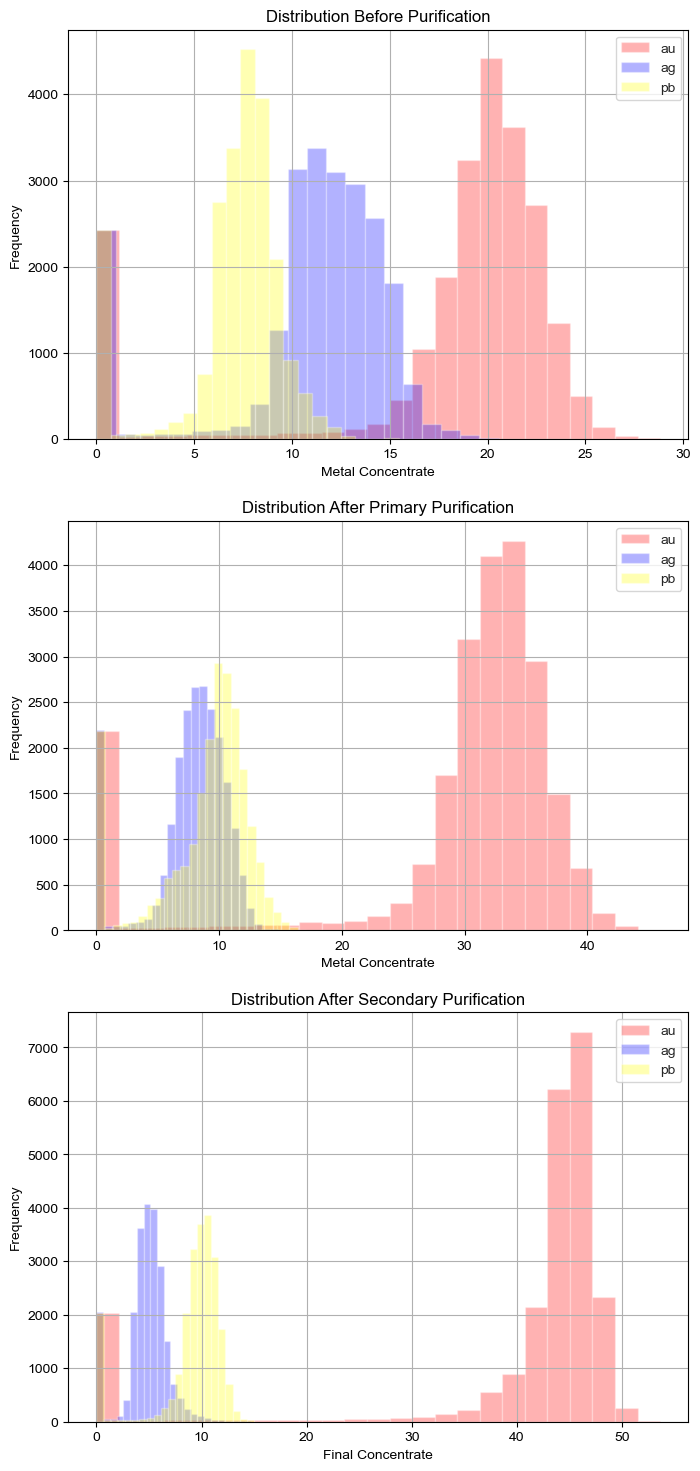

In [22]:
# Plotting all concentrations through 1st and 2nd stages of purification
figs, axes = plt.subplots(3,1,figsize=(8,4))
plt.subplots_adjust(bottom=-2.6)
sns.set_style('whitegrid')
source_df['rougher.output.concentrate_au'].plot(kind='hist',bins=25,ax=axes[0],color='red',alpha=0.3)
source_df['rougher.output.concentrate_ag'].plot(kind='hist',bins=25,ax=axes[0],color='blue',alpha=0.3)
source_df['rougher.output.concentrate_pb'].plot(kind='hist',bins=25,ax=axes[0],color='yellow',alpha=0.3)
source_df['primary_cleaner.output.concentrate_au'].plot(kind='hist',bins=25,ax=axes[1],color='red',alpha=0.3)
source_df['primary_cleaner.output.concentrate_ag'].plot(kind='hist',bins=25,ax=axes[1],color='blue',alpha=0.3)
source_df['primary_cleaner.output.concentrate_pb'].plot(kind='hist',bins=25,ax=axes[1],color='yellow',alpha=0.3)
source_df['final.output.concentrate_au'].plot(kind='hist',bins=25,ax=axes[2],color='red',alpha=0.3)
source_df['final.output.concentrate_ag'].plot(kind='hist',bins=25,ax=axes[2],color='blue',alpha=0.3)
source_df['final.output.concentrate_pb'].plot(kind='hist',bins=25,ax=axes[2],color='yellow',alpha=0.3)
axes[0].set_title('Distribution Before Purification')
axes[0].set_xlabel('Metal Concentrate')
axes[0].legend(['au','ag','pb'])
axes[1].set_title('Distribution After Primary Purification')
axes[1].set_xlabel('Metal Concentrate')
axes[1].legend(['au','ag','pb'])
axes[2].set_title('Distribution After Secondary Purification')
axes[2].set_xlabel('Final Concentrate')
axes[2].legend(['au','ag','pb'])
plt.show()

The figures above show us the concentration levels affect the concentration of gold differently. The concentration of gold increases while the concentration of silver and lead relatively remain the same.

There are many outlier values that should be removed. I'll remove all values 3 times removed from the stadard deviation of the mean for both training and test sets ahead.

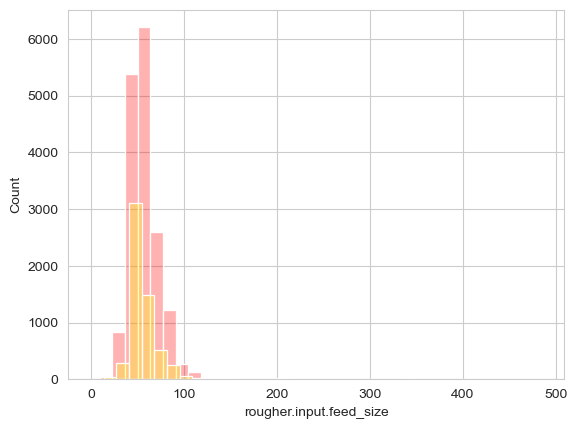

In [23]:
# Plotting particle size distributions of both training and test sets
plt.figure()
sns.histplot(training_df['rougher.input.feed_size'],bins=35,color='red',alpha=0.3)
sns.histplot(test_df['rougher.input.feed_size'],bins=35,color='yellow',alpha=0.3)
plt.show()

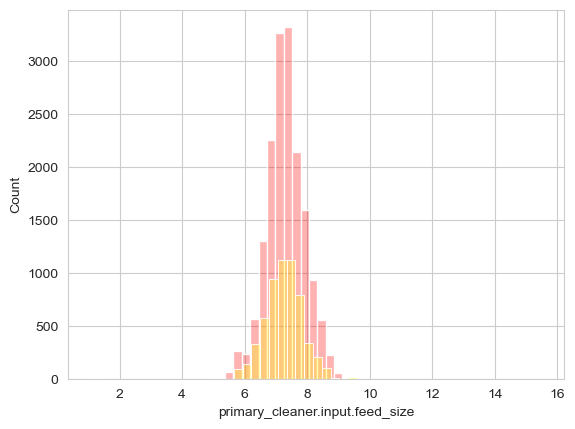

In [24]:
# Plotting primary input feed size distributions of both training and test sets
plt.figure()
sns.histplot(training_df['primary_cleaner.input.feed_size'],bins=35,color='red',alpha=0.3)
sns.histplot(test_df['primary_cleaner.input.feed_size'],bins=35,color='yellow',alpha=0.3)
plt.show()

The training and test sets show consistency in its feed particle size distributions. No need for any balancing.

In [25]:
# Assigining variables representing each stage with the columns that hold concentration values of each metal
rougher = ['rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb']

feed = ['rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',]

final = ['final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb']

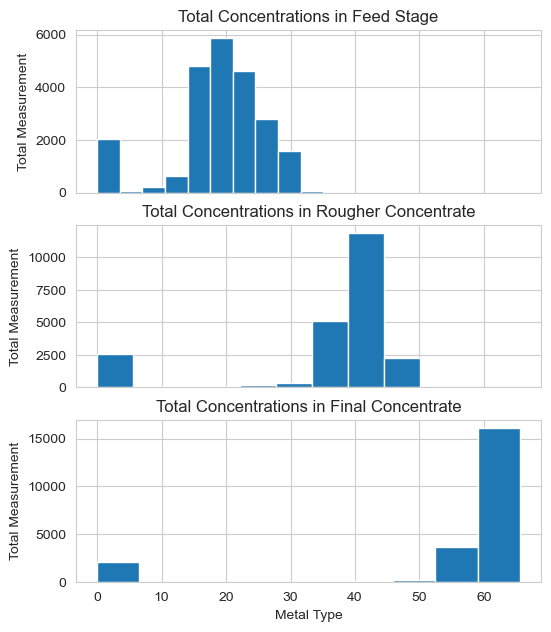

In [26]:
# Plotting distributions of total concentrations of particles in each stage in each stage
figs, axes = plt.subplots(3,1,figsize=(6,4),sharex=True)
plt.subplots_adjust(bottom=-.5)
source_df[feed].sum(axis=1).plot(
    kind='hist',ax=axes[0])
source_df[rougher].sum(axis=1).plot(
    kind='hist',ax=axes[1])
source_df[final].sum(axis=1).plot(
    kind='hist',ax=axes[2])

axes[0].set_xlabel('Metal Type')
axes[0].set_ylabel('Total Measurement')
axes[1].set_xlabel('Metal Type')
axes[1].set_ylabel('Total Measurement')
axes[2].set_xlabel('Metal Type')
axes[2].set_ylabel('Total Measurement')
axes[0].set_title('Total Concentrations in Feed Stage')
axes[1].set_title('Total Concentrations in Rougher Concentrate')
axes[2].set_title('Total Concentrations in Final Concentrate')
plt.show()

Although silver led the total in measurement of particles during the feed stage, gold remained the highest in concentration totals in the rougher and final stages. 

In [27]:
# Reviewing set shape and description
print(training_df.shape)
training_df.describe()

(16860, 54)


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,...,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000,16860.000000
mean,65.442374,120.871913,8.076769,7.297285,0.803088,1520.285752,-505.860509,1522.878435,-507.343032,1513.344469,...,18.991344,-495.660132,14.720217,-477.888168,15.723938,-501.241414,12.337585,-499.883297,18.375592,-522.749245
std,11.163145,53.549424,4.132746,0.619166,0.444944,381.859039,77.768866,383.042849,79.875403,398.175704,...,7.011934,87.176214,6.056299,91.421300,6.884182,78.768648,6.246227,83.640336,7.049470,78.810633
min,0.000000,0.000003,0.000000,1.080000,0.000005,0.000000,-800.037388,0.000000,-800.409770,0.000000,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,60.936143,94.457154,5.854896,6.940000,0.501709,1503.473073,-500.414460,1502.798109,-500.490818,1500.677664,...,14.495564,-500.860607,10.132552,-500.281867,10.974258,-500.539091,8.123338,-500.151243,13.957329,-501.106018
50%,66.824401,127.495647,7.986136,7.285000,0.805304,1601.130609,-499.952317,1601.117368,-499.985018,1600.901091,...,19.984900,-499.791231,14.941325,-499.604597,15.991785,-499.790224,11.046139,-499.935386,18.031935,-500.112866
75%,71.961441,156.788707,11.007844,7.700000,1.090309,1699.301875,-499.413018,1699.997151,-499.437660,1700.218571,...,24.983077,-494.979388,20.022051,-400.141749,19.997734,-496.590225,15.972085,-498.640260,24.984809,-499.567988
max,100.000000,251.999948,40.000000,10.470000,6.027907,2079.531340,-330.134203,2361.414084,-336.237097,2042.072583,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [28]:
# Dropping outliers
training_df = training_df[(np.abs(st.zscore(training_df)) < 3).all(axis=1)]
test_df = test_df[(np.abs(st.zscore(test_df)) < 3).all(axis=1)]

In [29]:
# Checking new shape and description after dropping outliers
print('Training set:',training_df.shape)
print('Test set:',test_df.shape)
training_df[feed].describe()

Training set: (13907, 54)
Test set: (4488, 54)


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb
count,13907.000000,13907.000000,13907.000000
mean,7.717883,8.445622,3.440554
std,2.286153,2.327367,1.218592
min,0.000000,0.000000,0.000000
25%,6.503191,7.069791,2.707502
50%,7.591652,8.106432,3.379019
75%,9.103780,9.985502,4.231345
max,14.093363,14.869652,7.142594


## Feature Preprocessing
---

We'll have to reduce our number of features as too many will mislead our models towards making bad predictions. We will just keep the features pertaining to gold.

We're going to create the sMAPE function as a way to score our models as shown below:

<img src='https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_smape_1576239058_1589899769.jpg' height=200px width=1200px>

We'll use the results of the above formula to calculate the final sMAPE scores as shown below:

<img src='https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved__smape_1_1589900649.jpg' height=200px width=1200px>

In [30]:
# Creating features and target sets for training and test sets
features_train = training_df.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target_train = training_df[['rougher.output.recovery','final.output.recovery']]
features_test = test_df.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target_test = test_df[['rougher.output.recovery','final.output.recovery']]

In [31]:
def sMAPE(y_test,pred):
    return (np.abs(y_test - pred) / (np.abs(y_test) + np.abs(pred))/2).mean() * 100

In [32]:
def final_sMAPE(y_test,pred):
    smape_0 = sMAPE(y_test.iloc[:,0],pred[:,0])
    smape_1 = sMAPE(y_test.iloc[:,1],pred[:,1])
    return .25 * smape_0 + .75 * smape_1

In [33]:
# Creating target_test variables to pass through smape function for model scoring
rough_target = target_test['rougher.output.recovery']
final_target = target_test['final.output.recovery']

In [34]:
# Standardizing training set features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [35]:
# Creating smape function into new scorer for cross validation
smape_score = make_scorer(score_func=final_sMAPE)

## Model Creation/Testing
---

In [36]:
# Creating linear regression model for training and testing
lr = LinearRegression()
lr.fit(features_train,target_train)

LinearRegression()

In [37]:
# Cross validating smape scores for the linear regression model
lr_scores = cross_val_score(
    estimator=lr,X=features_train,y=target_train,scoring=smape_score,cv=10)
lr_scores.mean()

2.0448329204905584

The linear model performed well. An average of 2% smape score is not too shabby. We'll see how this score compares with the other models.

Let's move on to a random forest regression model to see how it performs.

In [38]:
# Creating Random Forest Regression model
forest = RandomForestRegressor(random_state=12345)

# Creating variable with hyperparameters for tuning
params = {
    'n_estimators' : np.arange(100,126,5),
    'max_depth' : np.arange(2,4,1),
}

forest_cv = GridSearchCV(
    estimator = forest,
    param_grid = params,
    cv = 4,
    verbose = 3,
    scoring = smape_score,
    
)

In [39]:
# Fitting GridSearchCV
forest_cv.fit(features_train,target_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END .....max_depth=2, n_estimators=100;, score=2.255 total time=   9.8s
[CV 2/4] END .....max_depth=2, n_estimators=100;, score=2.181 total time=  10.4s
[CV 3/4] END .....max_depth=2, n_estimators=100;, score=2.328 total time=   8.6s
[CV 4/4] END .....max_depth=2, n_estimators=100;, score=2.401 total time=   8.7s
[CV 1/4] END .....max_depth=2, n_estimators=105;, score=2.255 total time=   9.0s
[CV 2/4] END .....max_depth=2, n_estimators=105;, score=2.183 total time=   9.2s
[CV 3/4] END .....max_depth=2, n_estimators=105;, score=2.330 total time=   9.3s
[CV 4/4] END .....max_depth=2, n_estimators=105;, score=2.402 total time=   9.2s
[CV 1/4] END .....max_depth=2, n_estimators=110;, score=2.255 total time=   9.9s
[CV 2/4] END .....max_depth=2, n_estimators=110;, score=2.184 total time=   9.4s
[CV 3/4] END .....max_depth=2, n_estimators=110;, score=2.328 total time=   9.4s
[CV 4/4] END .....max_depth=2, n_estimators=110;

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': array([2, 3]),
                         'n_estimators': array([100, 105, 110, 115, 120, 125])},
             scoring=make_scorer(final_sMAPE, response_method='predict'),
             verbose=3)

In [40]:
# Displaying parameters of best performing estimator
forest_cv.best_params_

{'max_depth': 2, 'n_estimators': 105}

In [41]:
# Creating DF with GridSearch results
forest_df = pd.DataFrame(forest_cv.cv_results_).sort_values("rank_test_score")

# Printing top ten results
forest_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,9.145585,0.097047,0.009794,0.000933,2,105,"{'max_depth': 2, 'n_estimators': 105}",2.254919,2.182642,2.330298,2.402445,2.292576,0.082155,1
2,9.510610,0.198260,0.010567,0.001076,2,110,"{'max_depth': 2, 'n_estimators': 110}",2.254559,2.184130,2.327680,2.403331,2.292425,0.081708,2
4,10.314715,0.145358,0.010641,0.000334,2,120,"{'max_depth': 2, 'n_estimators': 120}",2.253182,2.183919,2.327159,2.402562,2.291706,0.081621,3
0,9.340551,0.750372,0.010328,0.001254,2,100,"{'max_depth': 2, 'n_estimators': 100}",2.254588,2.181329,2.328444,2.401440,2.291451,0.082085,4
3,10.696588,0.517277,0.011415,0.001436,2,115,"{'max_depth': 2, 'n_estimators': 115}",2.253548,2.182613,2.325486,2.402831,2.291120,0.081924,5
5,10.823193,0.222683,0.011596,0.000751,2,125,"{'max_depth': 2, 'n_estimators': 125}",2.252838,2.182305,2.323570,2.402248,2.290240,0.081709,6
10,15.300836,0.099573,0.012789,0.000406,3,120,"{'max_depth': 3, 'n_estimators': 120}",2.231966,2.216621,2.214912,2.299393,2.240723,0.034518,7
8,13.918582,0.228282,0.011687,0.001403,3,110,"{'max_depth': 3, 'n_estimators': 110}",2.228642,2.220536,2.215131,2.295620,2.239982,0.032480,8
9,14.956075,0.235545,0.011823,0.000471,3,115,"{'max_depth': 3, 'n_estimators': 115}",2.232722,2.214178,2.214338,2.297028,2.239566,0.034021,9
7,13.798148,0.607856,0.010903,0.000626,3,105,"{'max_depth': 3, 'n_estimators': 105}",2.231236,2.218201,2.216508,2.291268,2.239303,0.030538,10


In [42]:
forest_scores = cross_val_score(
    scoring=smape_score,estimator=forest_cv.best_estimator_,X=features_train,y=target_train,cv=10)
forest_scores.mean()

2.08705298304017

Not as good as our linear regression model but still performed well. This this model could do better but not worth the fit time compared to the linear regression model fit time.

We'll move on to our last model, ElasticNet Linear Regression model. We'll pass it through the MultiOutputRegressor tool. It's used as a wrap around regression models that can not generate more than one target value to generate multiple outputs.

Let see how it compares with the other models.

In [43]:
# Creating and hypertuning ElasticNet regression model
elasnet = ElasticNet(random_state=12345)
params = {
    'selection' : ['cyclic'],
    'alpha' : np.arange(0.3,2.0,0.1),
    'tol' : np.arange(0.0001,0.001,0.0005)
}
el_cv = GridSearchCV(
    estimator = elasnet,
    param_grid = params,
    cv = 4,
    verbose = 3,
    scoring = smape_score,
    
)

In [44]:
el_cv.fit(features_train,target_train)

Fitting 4 folds for each of 34 candidates, totalling 136 fits
[CV 1/4] END alpha=0.3, selection=cyclic, tol=0.0001;, score=2.337 total time=   0.1s
[CV 2/4] END alpha=0.3, selection=cyclic, tol=0.0001;, score=1.790 total time=   0.0s
[CV 3/4] END alpha=0.3, selection=cyclic, tol=0.0001;, score=2.096 total time=   0.0s
[CV 4/4] END alpha=0.3, selection=cyclic, tol=0.0001;, score=2.110 total time=   0.0s
[CV 1/4] END alpha=0.3, selection=cyclic, tol=0.0006000000000000001;, score=2.337 total time=   0.0s
[CV 2/4] END alpha=0.3, selection=cyclic, tol=0.0006000000000000001;, score=1.790 total time=   0.0s
[CV 3/4] END alpha=0.3, selection=cyclic, tol=0.0006000000000000001;, score=2.096 total time=   0.0s
[CV 4/4] END alpha=0.3, selection=cyclic, tol=0.0006000000000000001;, score=2.110 total time=   0.0s
[CV 1/4] END alpha=0.4, selection=cyclic, tol=0.0001;, score=2.329 total time=   0.0s
[CV 2/4] END alpha=0.4, selection=cyclic, tol=0.0001;, score=1.795 total time=   0.0s
[CV 3/4] END alpha

GridSearchCV(cv=4, estimator=ElasticNet(random_state=12345),
             param_grid={'alpha': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9]),
                         'selection': ['cyclic'],
                         'tol': array([0.0001, 0.0006])},
             scoring=make_scorer(final_sMAPE, response_method='predict'),
             verbose=3)

In [45]:
el_cv.best_params_

{'alpha': 1.9000000000000006,
 'selection': 'cyclic',
 'tol': 0.0006000000000000001}

In [46]:
# Wrapping ElasticNet model with MultiOutputRegressor
multi = MultiOutputRegressor(
    el_cv.best_estimator_, n_jobs = 3)


In [47]:
# Cross validating wrapped ElaticNet model scores
el_scores = cross_val_score(
    estimator=multi,scoring=smape_score,X=features_test,y=target_test,cv=10)
el_scores.mean()

1.5707550202581266

The wrapped ElasticNet performed better than the linear regression and random forest regressor. 

We now have a final model.

In [48]:
# Displaying Results
score_list = {
    "Linear Regression" : lr_scores.mean(), 
    "Random Forest" : forest_scores.mean(), 
    "ElasticNet" : el_scores.mean()
    }

sorted_scores = sorted(score_list.items(), key=lambda item: item[1], reverse=False)

print('1st Place score: ',sorted_scores[0])
print('2nd Place score: ',sorted_scores[1])
print('Last Place score: ',sorted_scores[2])

1st Place score:  ('ElasticNet', 1.5707550202581266)
2nd Place score:  ('Linear Regression', 2.0448329204905584)
Last Place score:  ('Random Forest', 2.08705298304017)


## Final Model Selection/Testing
---
And now- the moment I have been waiting for. The Linear Regression model has made the final cut. We'll now run our test and get its final smape score.

In [49]:
# Fitting & testing final model
multi.fit(features_train,target_train)
final_pred = multi.predict(features_test)

In [50]:
# Getting Final sMAPE score
smape_final = final_sMAPE(target_test,final_pred)
smape_final

1.5469161574748278

Not far off our cross vaidated score. Let's check the model's MAE score to get a better feel of this model's performance.

In [51]:
# Getting mean absolute error score
mae = mean_absolute_error(target_test,final_pred)
print('Mean Absolute Error score: ',mae)

Mean Absolute Error score:  4.193469233587146


Pretty accurate predictions if you ask me. Here we have it our final model; ElaticNet with a multi-output wrapper with some impressive scores, but I'm sure could use some improvements.

## Conclusion
---
In conclusion, this analysis gave us insight on how much the purification stages increases the concentration of the gold much more than the silver and lead particles, surely by design. The figures shown during the data analysis visualize the magnitude of the affects. We also verified recovery calculations are spot on so no needed changes there.

When analyzing the total concentrations of each stage can confirm the recovery process is does very well in extracting gold from the ore. The data shows the quality of the ore mined are very high in gold concentration. The production looks great here! 👍 

We now have a model that does well in predicting the rougher and final recovery values. This can help in production/profit forecasts. If developing a new mine or prospecting for a new mine, these models can assist in making the best decision available.

<em>Cheers!</em>